# Task 1

## Read data using pandas

In [2]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier


train_data = pd.read_csv('Data/adult_train.csv')
test_data = pd.read_csv('Data/adult_test.csv')

print(test_data)

       age     workclass     education  education-num      marital-status  \
0       25       Private          11th              7       Never-married   
1       38       Private       HS-grad              9  Married-civ-spouse   
2       28     Local-gov    Assoc-acdm             12  Married-civ-spouse   
3       44       Private  Some-college             10  Married-civ-spouse   
4       18             ?  Some-college             10       Never-married   
...    ...           ...           ...            ...                 ...   
16276   39       Private     Bachelors             13            Divorced   
16277   64             ?       HS-grad              9             Widowed   
16278   38       Private     Bachelors             13  Married-civ-spouse   
16279   44       Private     Bachelors             13            Divorced   
16280   35  Self-emp-inc     Bachelors             13  Married-civ-spouse   

              occupation    relationship                race     sex  \
0  

In [3]:
train_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


## Encoding the features as numbers

Split a dataframe into features (X) and target (Y)

In [ ]:
n_cols = len(train_data.columns)
Xtrain_dicts = train_data.iloc[:, :n_cols-1].to_dict('records')
Ytrain = train_data.iloc[:, n_cols-1]
Xtest_dicts = test_data.iloc[:, :n_cols-1].to_dict('records')
Ytest = test_data.iloc[:, n_cols-1]

In [ ]:
# Check the first record in the training data
Xtrain_dicts[0]

{'age': 27,
 'workclass': 'Private',
 'education': 'Some-college',
 'education-num': 10,
 'marital-status': 'Divorced',
 'occupation': 'Adm-clerical',
 'relationship': 'Unmarried',
 'race': 'White',
 'sex': 'Female',
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 44,
 'native-country': 'United-States'}

Combining the steps

In [38]:
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(Xtrain_dicts)
X_test_encoded = dv.transform(Xtrain_dicts)
# transfrom to DataFrame to exhibit
X_train_df = pd.DataFrame(X_train_encoded.toarray(), columns=dv.get_feature_names_out())
print(X_train_df.head())
X_test_df = pd.DataFrame(X_test_encoded.toarray(), columns=dv.get_feature_names_out())
print(X_test_df.head())

    age  capital-gain  capital-loss  education-num  education=10th  \
0  27.0           0.0           0.0           10.0             0.0   
1  27.0           0.0           0.0           13.0             0.0   
2  25.0           0.0           0.0           12.0             0.0   
3  46.0           0.0        1902.0            3.0             0.0   
4  45.0           0.0        2824.0            7.0             0.0   

   education=11th  education=12th  education=1st-4th  education=5th-6th  \
0             0.0             0.0                0.0                0.0   
1             0.0             0.0                0.0                0.0   
2             0.0             0.0                0.0                0.0   
3             0.0             0.0                0.0                1.0   
4             1.0             0.0                0.0                0.0   

   education=7th-8th  ...  sex=Male  workclass=?  workclass=Federal-gov  \
0                0.0  ...       0.0          0.0     

# Task 2

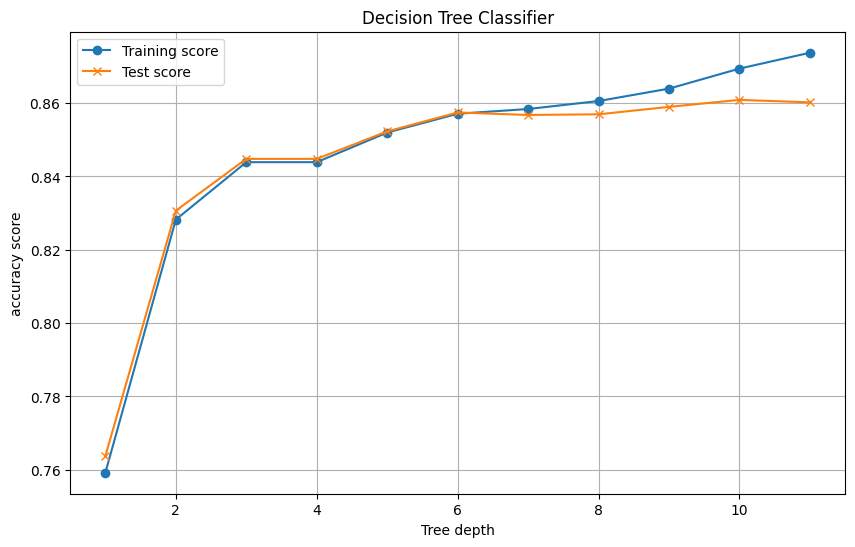

In [38]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def plot_learning_curves(X_train, Y_train, X_test, Y_test, max_depths):
    train_scores = []
    test_scores = []
    
    for depth in max_depths:
        reg = DecisionTreeClassifier(max_depth=depth)
        reg.fit(X_train, Y_train)
        train_scores.append(reg.score(X_train, Y_train))
        test_scores.append(reg.score(X_test, Y_test))
    
    plt.figure(figsize=(10, 6))
    plt.plot(max_depths, train_scores, label='Training score', marker='o')
    plt.plot(max_depths, test_scores, label='Test score', marker='x')
    plt.xlabel('Tree depth')
    plt.ylabel('accuracy score')
    plt.title('Decision Tree Classifier')
    plt.legend()
    plt.grid(True)
    plt.show()


train_data = pd.read_csv('Data/adult_train.csv')
test_data = pd.read_csv('Data/adult_test.csv')

n_cols = len(train_data.columns)
Xtrain_dicts = train_data.iloc[:, :n_cols-1].to_dict('records')
Ytrain = train_data.iloc[:, n_cols-1]


Xtest_dicts = test_data.iloc[:, :n_cols-1].to_dict('records')
Ytest = test_data.iloc[:, n_cols-1]

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(Xtrain_dicts)
X_test_encoded = dv.transform(Xtest_dicts)
X_train_df = pd.DataFrame(X_train_encoded.toarray(), columns=dv.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_encoded.toarray(), columns=dv.get_feature_names_out())


# print(f"num train: {len(X_train_encoded)}num test: {len(X_test_encoded)}")
plot_learning_curves(X_train_encoded, Ytrain, X_test_encoded, Ytest, range(1, 12))

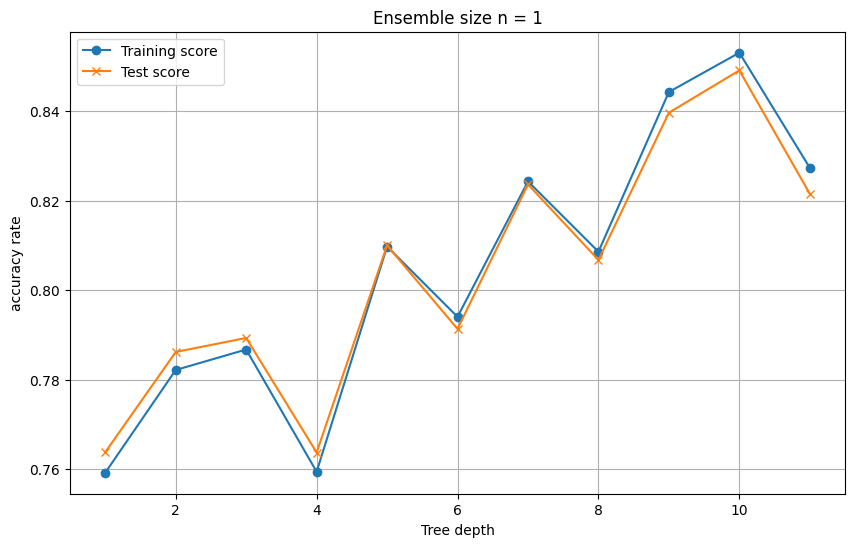

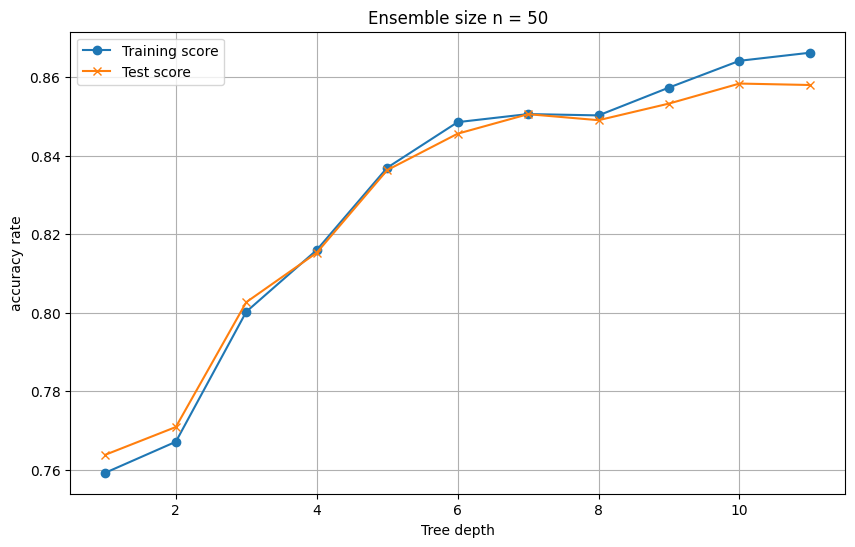

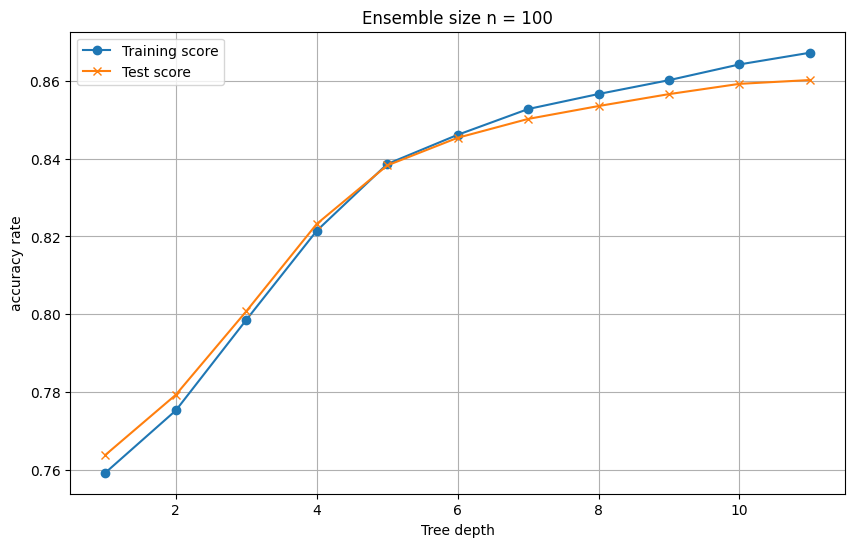

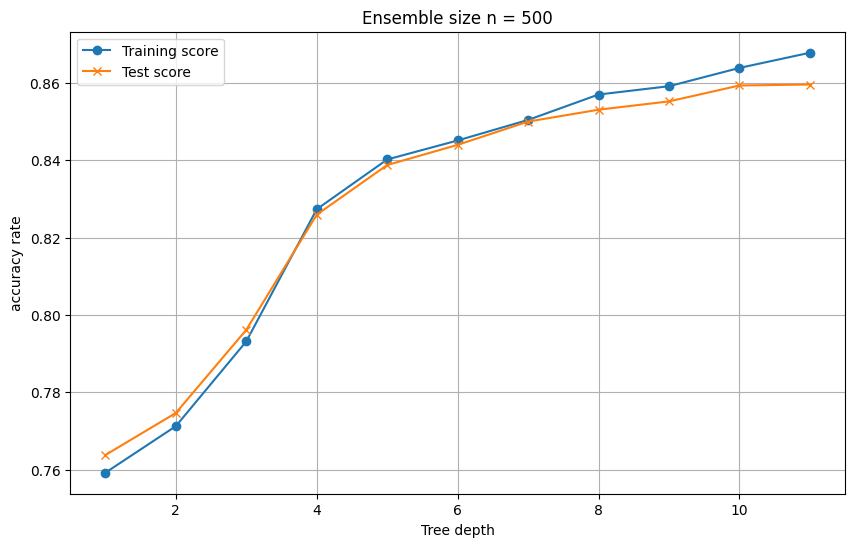

In [37]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

def plot_learning_curves(X_train, Y_train, X_test, Y_test, max_depths, n_estimators_list):
    for n in n_estimators_list:
        train_scores = []
        test_scores = []
        for depth in max_depths:
            reg = RandomForestClassifier(max_depth=depth, n_estimators = n, n_jobs = 4)
            reg.fit(X_train, Y_train)
            train_scores.append(reg.score(X_train, Y_train))
            test_scores.append(reg.score(X_test, Y_test))
        
        plt.figure(figsize=(10, 6))
        plt.plot(max_depths, train_scores, label='Training score', marker='o')
        plt.plot(max_depths, test_scores, label='Test score', marker='x')
        plt.xlabel('Tree depth')
        plt.ylabel('accuracy rate')
        plt.title(f'Ensemble size n = {n}')
        plt.legend()
        plt.grid(True)
        plt.show()


train_data = pd.read_csv('Data/adult_train.csv')
test_data = pd.read_csv('Data/adult_test.csv')

n_cols = len(train_data.columns)
Xtrain_dicts = train_data.iloc[:, :n_cols-1].to_dict('records')
Ytrain = train_data.iloc[:, n_cols-1]


Xtest_dicts = test_data.iloc[:, :n_cols-1].to_dict('records')
Ytest = test_data.iloc[:, n_cols-1]

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(Xtrain_dicts)
X_test_encoded = dv.transform(Xtest_dicts)
X_train_df = pd.DataFrame(X_train_encoded.toarray(), columns=dv.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_encoded.toarray(), columns=dv.get_feature_names_out())


# print(f"num train: {len(X_train_encoded)}num test: {len(X_test_encoded)}")
plot_learning_curves(X_train_encoded, Ytrain, X_test_encoded, Ytest, range(1, 12), [1, 50, 100, 500])

## Analysis
- Decision Tree has curve more closely representing a logarithmic function whereas the random forest with ensemble size = 1 is much more chaotic. The chaotic random forest graph is likely due to the fact that a random subset of features is taken and bootstrapping. 
- Random forest curves more closely approximate curves found for decision trees as the ensemble size grows
- the accuracy generally increases with larger ensemble sizes
- training time generally gorws with larger ensemble sizes
